In [37]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# # Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# Import the dataframe
df = pd.read_csv('cacao_engineered.csv')

# Remove unnamed columns and target column
df.drop(df.columns[df.columns.str.contains('unnamed', case = False)] , axis = 1, inplace = True)
X = df.drop(['Rating'], axis=1)

y = df['Rating']

# Clean up columns of X so it works with the model
X.columns = [col.replace(" ", "_").replace(":", "_") for col in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X: ", X)
print("Y: ", y)

X:         REF  Review_Date  Cocoa_Percent  Company_Location_AF  \
0     1876         2016           63.0                  0.0   
1     1676         2015           70.0                  0.0   
2     1676         2015           70.0                  0.0   
3     1680         2015           70.0                  0.0   
4     1704         2015           70.0                  0.0   
...    ...          ...            ...                  ...   
1790   647         2011           70.0                  0.0   
1791   749         2011           65.0                  0.0   
1792   749         2011           65.0                  0.0   
1793   781         2011           62.0                  0.0   
1794   486         2010           65.0                  0.0   

      Company_Location_AS  Company_Location_CA  Company_Location_CEU  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0

In [39]:
dataframes_by_location = {}

company_locations = ['Company Location_AF', 'Company Location_AS', 'Company Location_CA', 'Company Location_CEU', 'Company Location_OC', 
                     'Company Location_CR', 'Company Location_EEU', 'Company Location_NA', 'Company Location_SA', 'Company Location_WEU']

print(df.columns.tolist())

for location in company_locations:
    location_df = df[df[location] == 1].copy()
    location_df.drop(company_locations, axis=1, inplace=True)
    
    dataframes_by_location[location] = location_df

for location in company_locations:
    loc_df = dataframes_by_location[location]
    print('Locations: ', location)
    print(loc_df.head())
    print()

['REF', 'Review Date', 'Cocoa Percent', 'Rating', 'Company Location_AF', 'Company Location_AS', 'Company Location_CA', 'Company Location_CEU', 'Company Location_CR', 'Company Location_EEU', 'Company Location_NA', 'Company Location_OC', 'Company Location_SA', 'Company Location_WEU', 'Broad Bean Origin_AF', 'Broad Bean Origin_AS', 'Broad Bean Origin_CA', 'Broad Bean Origin_CR', 'Broad Bean Origin_NA', 'Broad Bean Origin_OC', 'Broad Bean Origin_SA', 'Broad Bean Origin_Unknown']
Locations:  Company Location_AF
      REF  Review Date  Cocoa Percent  Rating  Broad Bean Origin_AF  \
434   470         2010           73.5    3.75                   1.0   
435   209         2008           80.0    3.00                   1.0   
436   227         2008           75.0    4.00                   1.0   
437   252         2008          100.0    1.00                   1.0   
521  1832         2016           70.0    2.50                   1.0   

     Broad Bean Origin_AS  Broad Bean Origin_CA  Broad Bean O

In [40]:
xy_list = {}

for location in company_locations:
    df = dataframes_by_location[location]
    X = df.drop(['Rating'], axis=1)
    y = df['Rating']
    
    # Clean up columns of X so it works with the model
    X.columns = [col.replace(" ", "_").replace(":", "_") for col in X.columns]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    xy_list[location] = [X_train, X_test, y_train, y_test]


Locations:  Company Location_AF
{'Company Location_AF': [       REF  Review_Date  Cocoa_Percent  Broad_Bean_Origin_AF  \
822    431         2009           70.0                   0.0   
1709   404         2009           68.0                   1.0   
819   1466         2015           70.0                   0.0   
434    470         2010           73.5                   1.0   
521   1832         2016           70.0                   1.0   
990    284         2008           67.0                   1.0   
991    284         2008           70.0                   1.0   
522   1832         2016           70.0                   1.0   
823    431         2009           70.0                   0.0   
821    431         2009           70.0                   1.0   
435    209         2008           80.0                   1.0   
436    227         2008           75.0                   1.0   
1707   404         2009           80.0                   1.0   
437    252         2008          100.0         

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

models = []
params = []
scores = []

param_grid = {'C': [0.01, 10, 100], 'epsilon': [0.01, 10, 100], 'kernel': ['poly', 'rbf']}

#'gamma': [0.01, 1, 10],
#'epsilon': [0.01, 1],

grid_search = GridSearchCV(SVR(), param_grid, cv = 4, scoring = 'r2', verbose = 0, n_jobs = 1)

for location in company_locations:
    #X_train, X_test, y_train, y_test
    xy = xy_list[location]
    X_train = xy[0]
    y_train = xy[2]

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print("Location: ", location)
    print("Best Param: ", best_params)
    print("Best Train Score: ", best_score)

    model= grid_search.best_estimator_
    models.append(model)
    params.append(best_params)
    scores.append(best_score)


Location:  Company Location_AF
Best Param:  {'C': 0.01, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Train Score:  -0.25322410054779754
Location:  Company Location_AS
Best Param:  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Train Score:  -0.172155957881065
Location:  Company Location_CA
Best Param:  {'C': 0.01, 'epsilon': 0.01, 'kernel': 'poly'}
Best Train Score:  -0.023363381616353596
Location:  Company Location_CEU
Best Param:  {'C': 0.01, 'epsilon': 0.01, 'kernel': 'poly'}
Best Train Score:  -0.02187758275111107
Location:  Company Location_OC
Best Param:  {'C': 0.01, 'epsilon': 10, 'kernel': 'poly'}
Best Train Score:  -0.057743230154324365


C:\Users\lmuka\anaconda3\envs\tflowenv\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lmuka\anaconda3\envs\tflowenv\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lmuka\anaconda3\envs\tflowenv\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lmuka\anaconda3\envs\tflowenv\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\lmuka\anaconda3\envs\tflowenv\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2

Location:  Company Location_CR
Best Param:  {'C': 0.01, 'epsilon': 0.01, 'kernel': 'poly'}
Best Train Score:  nan
Location:  Company Location_EEU
Best Param:  {'C': 0.01, 'epsilon': 0.01, 'kernel': 'poly'}
Best Train Score:  -0.12436750682325598
Location:  Company Location_NA
Best Param:  {'C': 100, 'epsilon': 0.01, 'kernel': 'poly'}
Best Train Score:  0.005540164484202553
Location:  Company Location_SA
Best Param:  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Train Score:  0.04692886446662711
Location:  Company Location_WEU
Best Param:  {'C': 100, 'epsilon': 0.01, 'kernel': 'poly'}
Best Train Score:  0.03666446212977023


Location:  Company Location_AF
Mean Squared Error 0.19239539527527041
Root Mean Squared Error 0.4386289950234371
Adjusted R Squared Score:  -0.3223669482391467
Mean Absolute Error: 0.008229456135595213
Mean Absolute Percentage Error: 13.324184368651313%



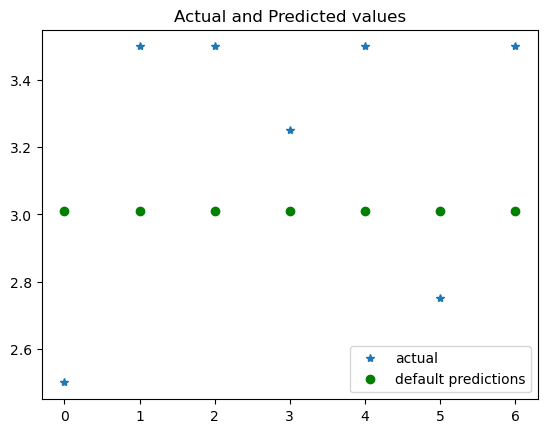

Location:  Company Location_AS
Mean Squared Error 0.16698470316791394
Root Mean Squared Error 0.4086376183954604
Adjusted R Squared Score:  -0.6378576249419914
Mean Absolute Error: 0.0075967985459417225
Mean Absolute Percentage Error: 12.048592921348902%



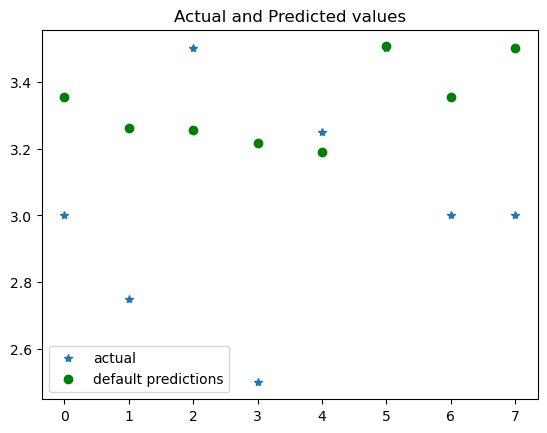

Location:  Company Location_CA
Mean Squared Error 0.08350915005435354
Root Mean Squared Error 0.2889794976366897
Adjusted R Squared Score:  -0.11977350051058111
Mean Absolute Error: 0.005618146837021761
Mean Absolute Percentage Error: 8.197700423444829%



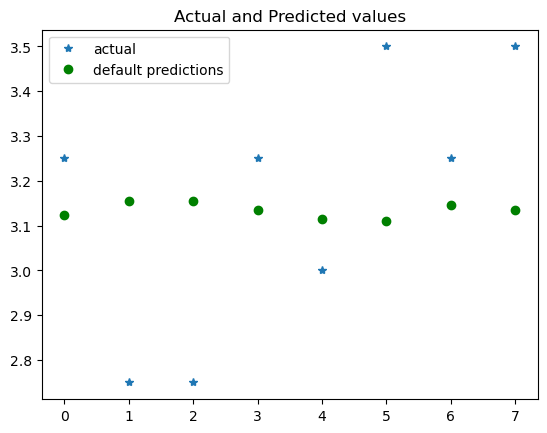

Location:  Company Location_CEU
Mean Squared Error 0.16098208439564324
Root Mean Squared Error 0.4012257274847206
Adjusted R Squared Score:  -0.04201552645063855
Mean Absolute Error: 0.029196798160129333
Mean Absolute Percentage Error: 9.857061787382595%



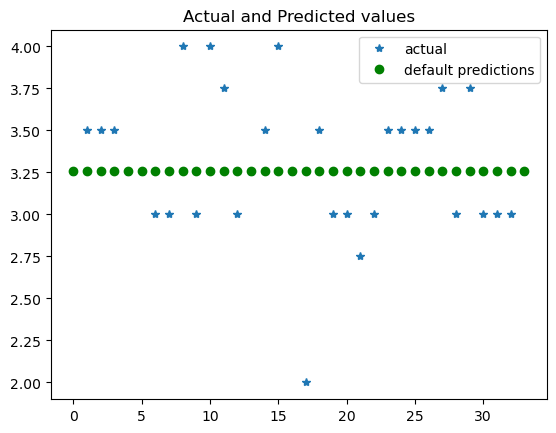

Location:  Company Location_OC
Mean Squared Error 0.15178571428571427
Root Mean Squared Error 0.3895968612369898
Adjusted R Squared Score:  -0.043249561659847835
Mean Absolute Error: 0.012465373961218837
Mean Absolute Percentage Error: 9.861239950525663%



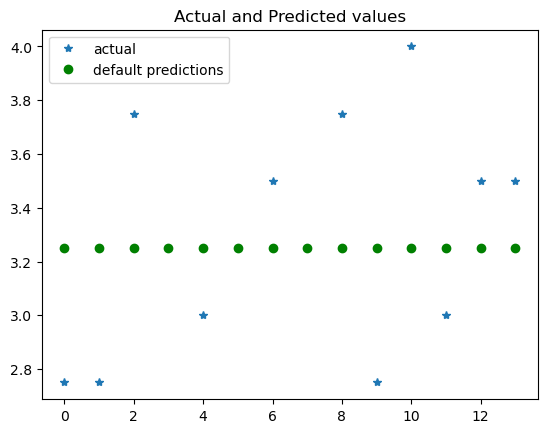

Location:  Company Location_CR
Mean Squared Error 0.06524314435518973
Root Mean Squared Error 0.25542737589222836
Adjusted R Squared Score:  -0.034482758620689724
Mean Absolute Error: 0.0014151100204840793
Mean Absolute Percentage Error: 9.288267588995502%



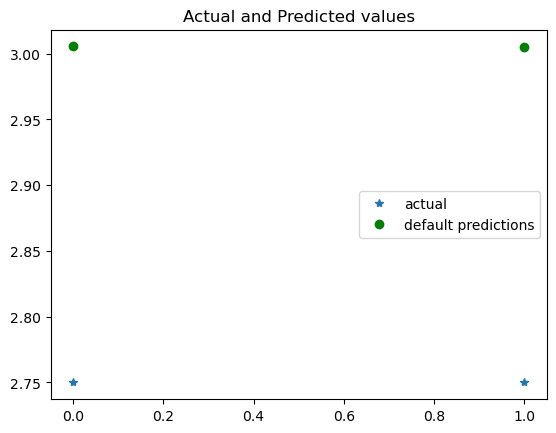

Location:  Company Location_EEU
Mean Squared Error 0.1824187500567601
Root Mean Squared Error 0.4271050808135629
Adjusted R Squared Score:  -0.21533376745687915
Mean Absolute Error: 0.007691433019788762
Mean Absolute Percentage Error: 12.374100821246948%



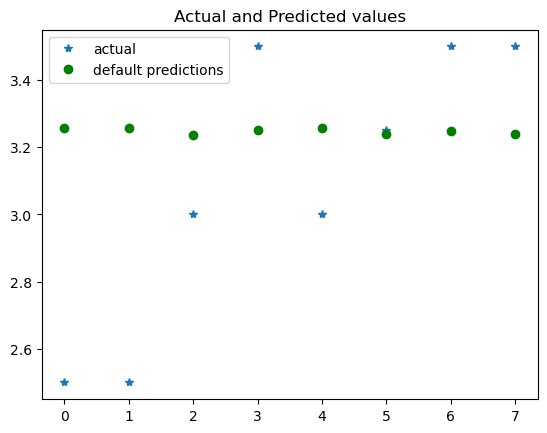

Location:  Company Location_NA
Mean Squared Error 0.1692808824004606
Root Mean Squared Error 0.41143758019954935
Adjusted R Squared Score:  -0.06730594744436158
Mean Absolute Error: 0.15972400605162854
Mean Absolute Percentage Error: 10.38885478456297%



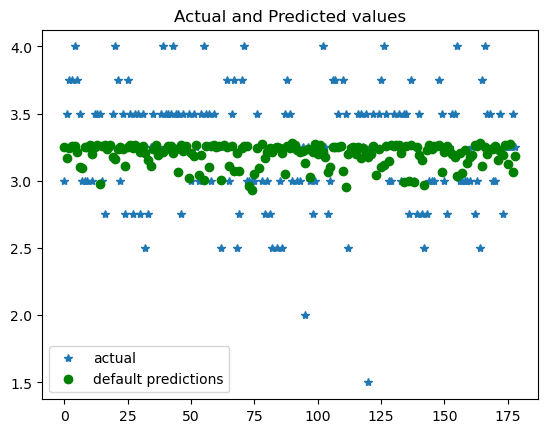

Location:  Company Location_SA
Mean Squared Error 0.37697376331451454
Root Mean Squared Error 0.6139818916829017
Adjusted R Squared Score:  0.10422568769220009
Mean Absolute Error: 0.03910225610785748
Mean Absolute Percentage Error: 20.194089684498007%



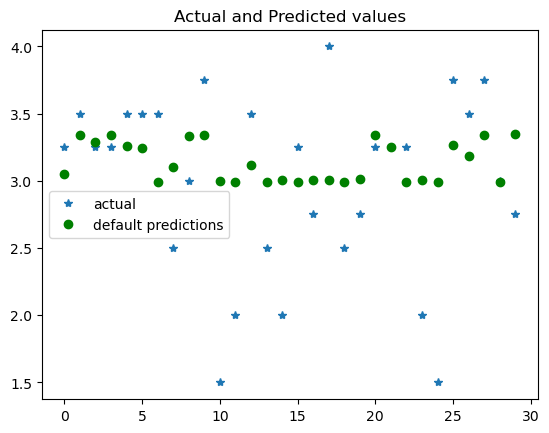

Location:  Company Location_WEU
Mean Squared Error 0.2369666141029581
Root Mean Squared Error 0.4867921672571962
Adjusted R Squared Score:  0.03901444067183746
Mean Absolute Error: 0.08317058164421591
Mean Absolute Percentage Error: 13.152439373471625%



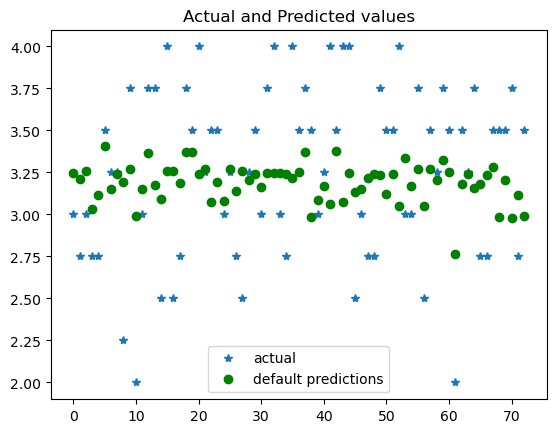

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

for i in range(len(company_locations)):
    location = company_locations[i]
    print("Location: ", location)
    model = models[i]
    #X_train, X_test, y_train, y_test
    xy = xy_list[location]
    X_test = xy[1]
    y_test = xy[3]
    
    y_pred = model.predict(X_test)
    
    # evaluate model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error", mse)
    rmse = mse**0.5
    print("Root Mean Squared Error", rmse)
    r2 = r2_score(y_test, y_pred)
    
    #adjusted rscore is just rscore but the rscore only improves if additional features actually improves the model's performance. 
    #Basically it negates the weakness of rscore which is that the score increases as the number of features increase
    adjusted_r2score = 1- ((1 - r2) * ((df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1)))
    print("Adjusted R Squared Score: ", adjusted_r2score)
    
    mae = (1/ df.shape[0]) * sum(abs(y_test - y_pred))
    print(f"Mean Absolute Error: {mae}")
    errors = abs(y_test - y_pred)
    mape = (1/len(y_test)) * sum(errors / y_test) * 100
    print(f"Mean Absolute Percentage Error: {mape}%")
    print()

    entry = list(range(len(X_test)))

    #plot actual values
    plt.plot(entry, y_test, '*', label='actual')
    plt.plot(entry, y_pred, 'og', label='default predictions')
    plt.legend()
    plt.title('Actual and Predicted values')
    plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 100], 'epsilon': [0.01, 10, 100], 'kernel': ['poly', 'rbf']}

#'gamma': [0.01, 1, 100],
#'epsilon': [0.01, 1],

grid_search = GridSearchCV(SVR(), param_grid, cv = 5, scoring = 'r2', verbose = 3, n_jobs = 1)
grid_search.fit(X_train, y_train)

# svr = SVR(kernel = 'rbf')
# svr.fit(X_train, y_train)
# y_pred = svr.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .C=0.01, epsilon=0.01, kernel=poly;, score=0.003 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.007 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.015 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.004 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.01, kernel=poly;, score=-0.001 total time=   0.0s
[CV 1/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.006 total time=   0.1s
[CV 2/5] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.003 total time=   0.1s
[CV 3/5] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.011 total time=   0.1s
[CV 4/5] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.000 total time=   0.1s
[CV 5/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.001 total time=   0.0s
[CV 1/5] END ..C=0.01, epsilon=10, kernel=poly;, score=-2.104 total time=   0.0s
[CV 2/5] END ..C=0.01, epsilon=10, kernel=poly;,

GridSearchCV(cv=5, estimator=SVR(), n_jobs=1,
             param_grid={'C': [0.01, 10, 100], 'epsilon': [0.01, 10, 100],
                         'kernel': ['poly', 'rbf']},
             scoring='r2', verbose=3)

In [3]:
from sklearn.metrics import classification_report

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Param: ", best_params)
print("Best Train Score: ", best_score)

score = grid_search.score(X_test, y_test)

print("score: ", score)

Best Param:  {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Train Score:  0.02359259033992791
score:  -0.00022435678615195798


In [4]:
from sklearn.metrics import mean_squared_error, r2_score

model= grid_search.best_estimator_
y_pred = model.predict(X_test)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error", mse)
rmse = mse**0.5
print("Root Mean Squared Error", rmse)
r2 = r2_score(y_test, y_pred)

#adjusted rscore is just rscore but the rscore only improves if additional features actually improves the model's performance. 
#Basically it negates the weakness of rscore which is that the score increases as the number of features increase
adjusted_r2score = 1- ((1 - r2) * ((df.shape[0] - 1) / (df.shape[0] - df.shape[1] - 1)))
print("Adjusted R Squared Score: ", adjusted_r2score)

mae = (1/ df.shape[0]) * sum(abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae}")
errors = abs(y_test - y_pred)
mape = (1/len(y_test)) * sum(errors / y_test) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Squared Error 0.23121471861291756
Root Mean Squared Error 0.4808479163029799
Adjusted R Squared Score:  -0.012642492141284656
Mean Absolute Error: 0.07303192782531256
Mean Absolute Percentage Error: 12.816788571528503%


In [8]:
import joblib

joblib.dump(model, 'SVR_model.joblib')


['SVR_model.joblib']

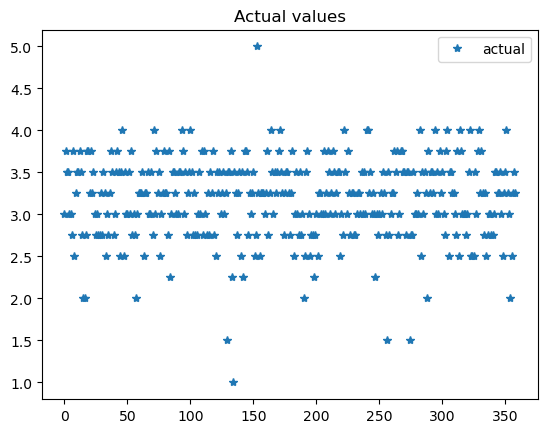

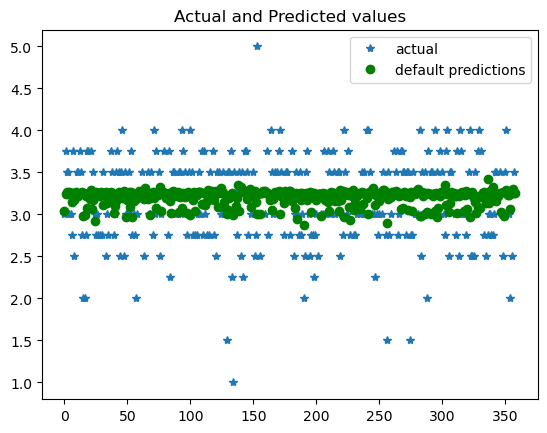

In [10]:
import matplotlib.pyplot as plt

entry = list(range(len(X_test)))

#plot just the actual values
plt.plot(entry, y_test, '*', label='actual')
plt.legend()
plt.title('Actual values')
plt.show()

#plot actual values
plt.plot(entry, y_test, '*', label='actual')

#plot predicted values
plt.plot(entry, y_pred, 'og', label='default predictions')
plt.legend()
plt.title('Actual and Predicted values')
plt.show()
